### Life cicle of machine learning project 

data analisys

- Understand the problem statement
- Data Collection
- Data checks to perform
- Exploratory data analysis

modeling development

- Understand the problem statement
- Data Collection
- Data preprocesing
- Feature Enginering
- Model training
- Choose best model

model deploying
- structure the code in modular programming
- configure the docker image to make code deployable
-deploy the model in aws


### 1.0 problem statement
A company X has employees, and the company keeps data such as their education level, the city they belong to, their age, and other information. The company has been tracking and has recorded which employees have left the company. The company wants to create a program that, based on an employee's data, predicts how likely it is that the employee will leave the company. Therefore, they have hired you to do this job

# 2.0 Data Collection

### 2.1 library to use

In [4]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### 2.2 Data extraction from database 

In [97]:
driver = "ODBC+Driver+17+for+SQL+Server"
server_name = "localhost"
database = "BDdatasets"
UID = "sa"
PWD = "0440"

connection_string = f"mssql+pyodbc://{UID}:{PWD}@{server_name}/{database}?driver={driver}"

engine = create_engine(connection_string)

query = "SELECT * FROM Employees"

df = pd.read_sql_query(query , engine)

### 2.3 shot top 5 records

In [2]:
df.head()

NameError: name 'df' is not defined

### 2.4 shape of the dataset

In [99]:
df.shape

(4653, 9)

### 2.5 dataset informatation

Education: the education level of the employee
JoiningYear: the year when employee joined to the company
City: the city where belong
PaymentTier: the level of payment
Age: the age of the employee
Gender: the gender of employee
EverBenched: if employee has been without proyect asignement
ExperienceInCurrentDomain: year of experience

LeaveOrNot: leave or not the company (label)

# 3.0 data check perform

- check missing values
- drop nulls if is necesary
- check duplicates
- check data types 
- check the number of unique values of eache column
- check statistic in the dataset
- check varios categories present in different categorical columns

### 3.1 check missing values

In [100]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

#### insighs: the is not null values in the dataset

### 3.2 drop na values

In [101]:
df = df.dropna()

### 3.3 check if there are duplicate values

In [102]:
df.duplicated().sum()

np.int64(1889)

In [103]:
df[df.duplicated()].head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,True
130,Bachelors,2017,Bangalore,3,26,Female,No,4,False
138,Bachelors,2017,New Delhi,3,28,Male,No,2,False
160,Bachelors,2014,Bangalore,3,28,Female,No,3,False
167,Bachelors,2014,Bangalore,3,25,Male,No,3,False
174,Bachelors,2013,Bangalore,3,26,Male,No,4,False
175,Bachelors,2016,Bangalore,3,26,Male,No,4,False
176,Bachelors,2012,Bangalore,3,25,Male,No,3,False
177,Bachelors,2015,Bangalore,3,25,Male,No,3,False
181,Bachelors,2015,Pune,3,27,Male,No,5,False


#### insights: 
the truth is the dataset no container rows duplicated, what happens some employees have similar features,  and that is completely normal for a business

### 3.4 check data types 

#### 3.4.1 check data tipes without apply transformation

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 295.5+ KB


#### 3.4.2 convert bool to int

In [105]:
df["LeaveOrNot"] = df["LeaveOrNot"].astype(int)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


#### 3.4.1 convert bool to int 

In [62]:
df["LeaveOrNot"] = df["LeaveOrNot"].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


### 3.5 check the numbers unique of values of each columns

In [107]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

### 3.6 check statistics of the dataset

In [108]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


#### insights
- the std is lower for the most of the numerical columns 
- the columns are in diferents scales

### check the varios categories in the datasets

In [109]:
df.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0


In [111]:
df_cat = df.select_dtypes(["object"])
print("columns and values")
print()
for col in df_cat.columns:
    values = df[col].unique()
    print(f"column : {col}") 
    print(f"values : {values}")
    print()

columns and values

column : Education
values : ['Bachelors' 'Masters' 'PHD']

column : City
values : ['Bangalore' 'Pune' 'New Delhi']

column : Gender
values : ['Male' 'Female']

column : EverBenched
values : ['No' 'Yes']



In [114]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!="O" ] 
categorical_features = [feature for feature in df.columns if df[feature].dtype =="O"]

print(f"we have {len(numerical_features)} numerical_features : {numerical_features}")
print(f"we have {len(categorical_features)} categorical_features : {categorical_features}")

we have 5 numerical_features : ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']
we have 4 categorical_features : ['Education', 'City', 'Gender', 'EverBenched']


### 4.0 exploratory data analysis

#### visualize the data creating 
- pie char
- histgram char
- count bar group by
- boxplot

In [118]:
df.head(1)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0


### 4.1 pie char


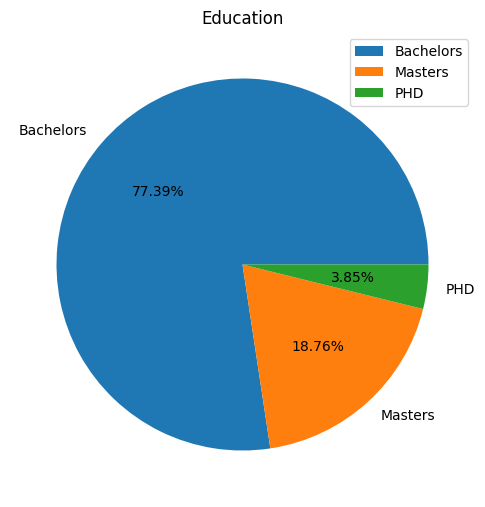

In [192]:
#create a pie chat of education categories
categories = df["Education"].value_counts().index
values = df["Education"].value_counts()
plt.figure(figsize = (6,8))
plt.pie(values , labels = categories , autopct = "%1.2f%%" )
plt.legend(categories ,loc =  "upper right")
plt.title("Education")
plt.show()

#### insights:
- the most of the employees have bachelor degree
- the number of phd degree is less than 5%

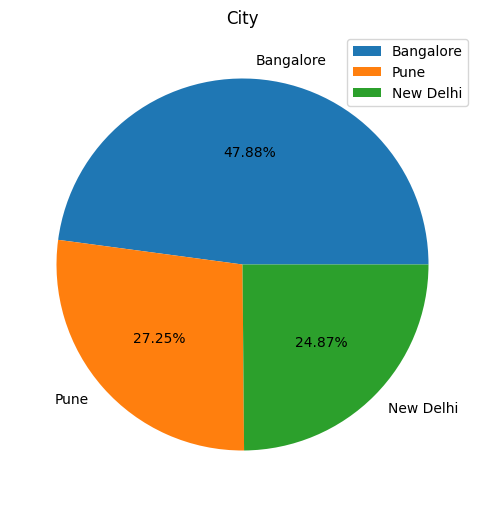

In [193]:
values = df["City"].value_counts()  
categories = df["City"].value_counts().index
plt.figure(figsize=(6,8))
plt.pie( values , labels =categories , autopct="%1.2f%%")
plt.legend(categories)
plt.title("City")
plt.show()

### insights
- basically the 50% of the employees are from bangalore
- the quantity of the other categories are almost the same, around 25%

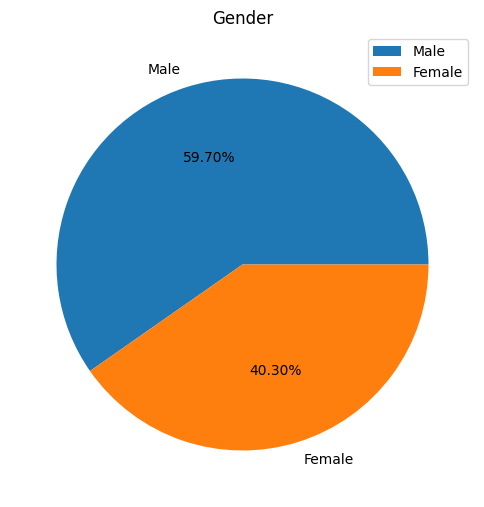

In [194]:
values = df["Gender"].value_counts() 
categories = df["Gender"].value_counts().index
plt.figure(figsize = (6,8))
plt.pie(values , labels = categories , autopct = "%1.2f%%" )
plt.legend(categories)
plt.title("Gender")
plt.show()

#### insights:
- most of the employees are mens

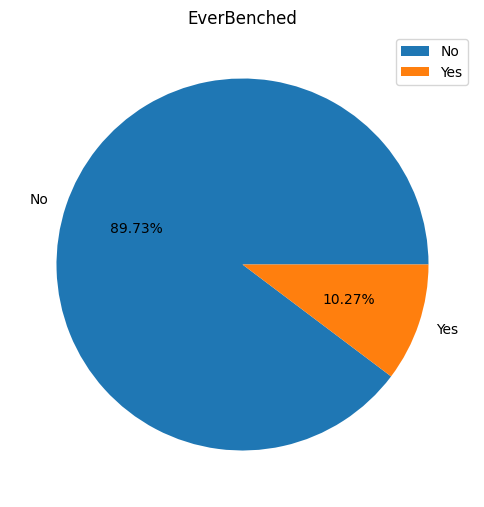

In [195]:
values = df["EverBenched"].value_counts()
categories = df["EverBenched"].value_counts().index
plt.figure(figsize=(6,8))
plt.pie(values , labels = categories  , autopct = "%1.2f%%")
plt.legend(categories)
plt.title("EverBenched")
plt.show()

#### insights 
- the most of the employead 90% has EverBenched asigned to no

### 4.2 histogram char

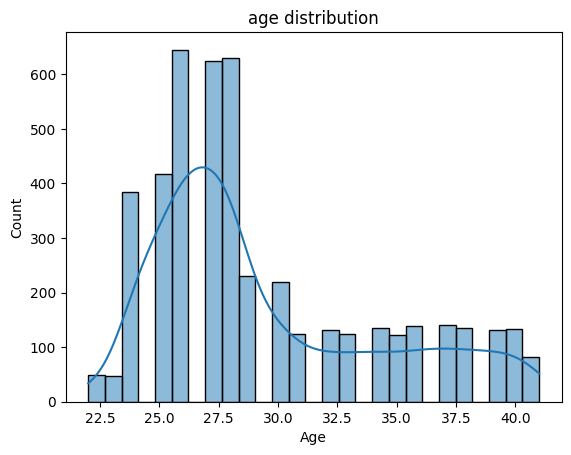

In [198]:
sns.histplot(data = df ,x = "Age" ,kde = True )
plt.title("age distribution")
plt.show()

### insight 
- most of the age employee are between 25 years and 28 years

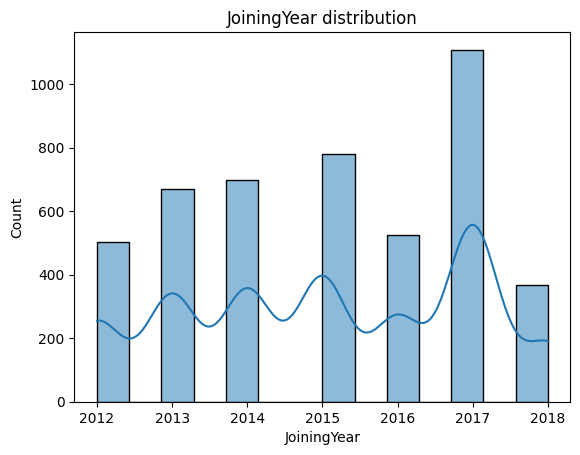

In [201]:
sns.histplot(data = df , x = "JoiningYear" , kde = True)
plt.title("JoiningYear distribution")
plt.show()

#### insight
- most of the employees were recluted in 2017

### 4.3 count bar group by

In [225]:
df_group_by_city = df.groupby("City")[numerical_features].mean()

In [226]:
df_group_by_city

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
City,,,,,
Bangalore,2014.859515,2.870287,29.594255,2.924596,0.267056
New Delhi,2015.522040,2.598099,29.121003,2.885048,0.316335
Pune,2015.001577,2.487382,29.288644,2.891167,0.503943


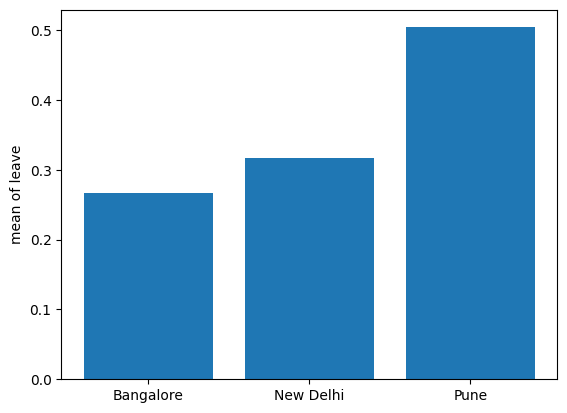

In [234]:
df_group_by_city
index = [ "Bangalore" , "New Delhi" , "Pune"]
values = [ df_group_by_city.loc["Bangalore"]["LeaveOrNot"] ,df_group_by_city.loc["New Delhi"]["LeaveOrNot"] , df_group_by_city.loc["Pune"]["LeaveOrNot"] ]
plt.bar(index , values )
plt.ylabel("mean of leave")
plt.show()

#### insights
- the 50% of employees that leave the company are from Pune

In [230]:
df_group_by_education = df.groupby("Education")[numerical_features].mean()
df_group_by_education.loc["PHD"]

JoiningYear                  2015.050279
PaymentTier                     2.731844
Age                            29.296089
ExperienceInCurrentDomain       2.910615
LeaveOrNot                      0.251397
Name: PHD, dtype: float64

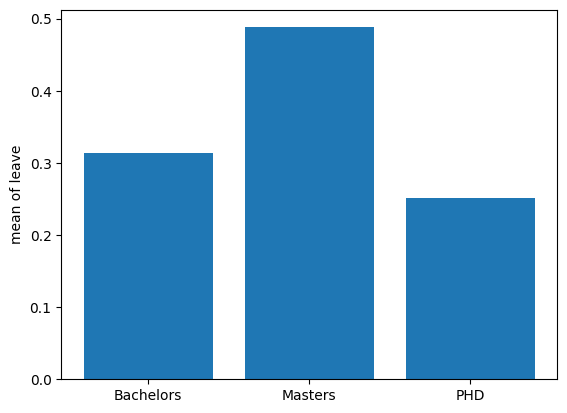

In [240]:
index = [ "Bachelors" , "Masters" , "PHD"]
values = [ df_group_by_education.loc["Bachelors"]["LeaveOrNot"] ,df_group_by_education.loc["Masters"]["LeaveOrNot"] , df_group_by_education.loc["PHD"]["LeaveOrNot"] ]
plt.bar(index , values )
plt.ylabel("mean of leave")
plt.show()

#### insights
- the employees with master leave more the company

In [239]:
df_group_by_gender = df.groupby("Gender")[numerical_features].mean()
df_group_by_gender

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
Gender,,,,,
Female,2015.090667,2.537600,29.41600,2.889067,0.471467
Male,2015.044276,2.806695,29.37797,2.916847,0.257739


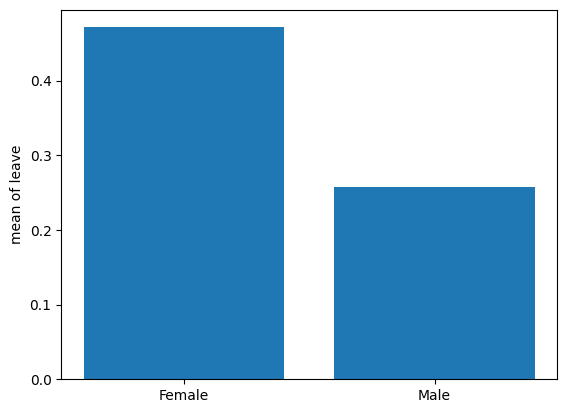

In [242]:
index = [ "Female" , "Male" ]
values = [ df_group_by_gender.loc["Female"]["LeaveOrNot"] ,df_group_by_gender.loc["Male"]["LeaveOrNot"]  ]
plt.bar(index , values )
plt.ylabel("mean of leave")
plt.show()

### insight
- around the 50% of females leaves the company

### 4.4 boxplot

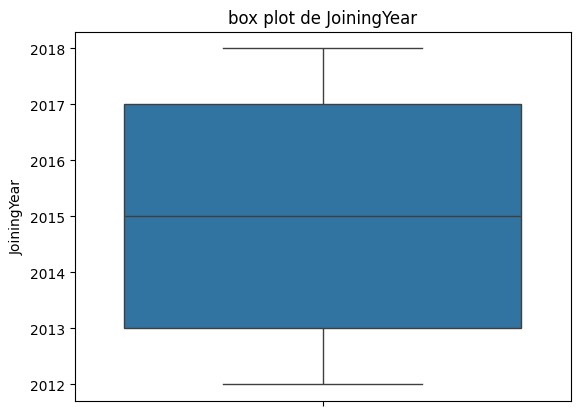

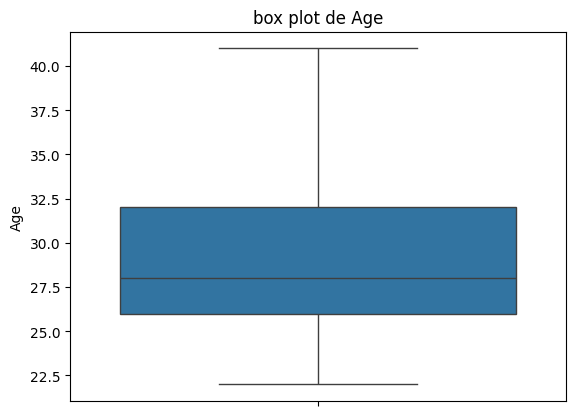

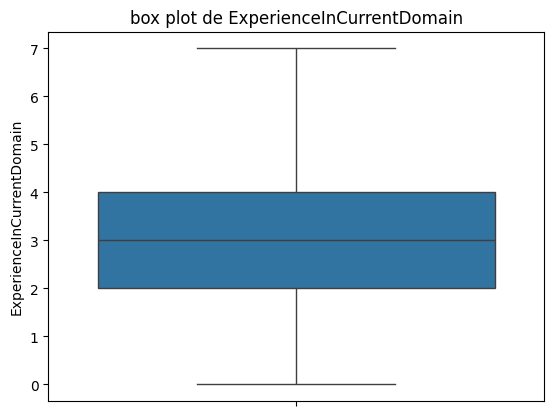

In [267]:

for column in [ "JoiningYear", "Age" , "ExperienceInCurrentDomain"]:
    sns.boxplot(y = df[column])
    plt.title(f"box plot de {column}")
    plt.show()
#plt.boxplot(x = )

eda end